# **Project Name**  -   **Android Authenticity Prediction**

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**    - Bholay Nath Singh

**BUSINESS PROBLEM OVERVIEW**



The proliferation of counterfeit Android devices has become a significant concern for mobile device manufacturers, network operators, and consumers alike. Counterfeit devices not only infringe on intellectual property rights but also pose serious security risks, as they often come pre-installed with malware and other vulnerabilities. Moreover, counterfeit devices can also lead to financial losses for manufacturers and network operators due to warranty claims, returns, and lost sales.


To combat this issue, it is essential to develop an effective Android authenticity prediction system that can accurately identify genuine devices from counterfeit ones. By leveraging machine learning algorithms and data analytics, such a system can help manufacturers and network operators to detect and prevent counterfeit devices from entering the market, thereby protecting their brand reputation, reducing financial losses, and ensuring the safety and security of consumers' personal data.

# **GitHub Link -** https://github.com/BholaySingh23/Android-Authentication-Prediction.git

## ***1. Know Your Data***

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


###   Dataset Loading

In [2]:
#Importing The Dataset
dataset = pd.read_csv('ANDRIOD AUTHENTICITY PREDICTION.csv',encoding='latin1')

### Dataset First View

In [3]:
#Dataset First
dataset.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,...,0,0,0,0,0,0,0,0,0,1


### Dataset Rows & Columns Count

In [4]:
#Dataset rows & columns
dataset.shape

(29999, 184)

### Dataset Info

In [5]:
#Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Columns: 184 entries, App to Class
dtypes: float64(3), int64(176), object(5)
memory usage: 42.1+ MB


### What did you know about your dataset?

The dataset has a lot of dimentions which consists of both Numeric as well as categorical columns and indiviually it cant be handled.

## ***2. Understanding Your Variables***

In [6]:
# Dataset Describe
dataset.describe(include='all')

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
count,29998,29999,29999,29996,29999.000000,2.999900e+04,29999.000000,29244,29795.000000,29999.000000,...,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
unique,22823,23485,30,23552,NaN,NaN,NaN,23868,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Tic Tac Toe,com.shazam.android,Entertainment,Phrasebook and Translator contains all the ess...,NaN,NaN,NaN,{com.openkava.spinpic},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,47,10,2827,40,NaN,NaN,NaN,38,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.537215,6.852608e+03,0.625707,NaN,3.111160,1.353978,...,0.014667,0.087970,0.023801,0.001333,0.000567,0.000400,0.016567,0.039735,0.001500,0.666689
std,NaN,NaN,NaN,NaN,1.424685,4.586899e+04,3.222620,NaN,3.052602,1.523491,...,0.120219,0.283255,0.152431,0.036492,0.023799,0.019997,0.127645,0.195338,0.038702,0.471405
min,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,3.300000,4.000000e+00,0.000000,NaN,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,4.000000,4.600000e+01,0.000000,NaN,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,NaN,NaN,NaN,NaN,4.400000,7.160000e+02,0.000000,NaN,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


## ***3. Data Wrangling***

#### Duplicate Values

In [7]:
for column in dataset.columns:
  duplicate_count = dataset[column].duplicated().sum()
  print(f"Column '{column}' has {duplicate_count} duplicate values.")

Column 'App' has 7175 duplicate values.
Column 'Package' has 6514 duplicate values.
Column 'Category' has 29969 duplicate values.
Column 'Description' has 6446 duplicate values.
Column 'Rating' has 29957 duplicate values.
Column 'Number of ratings' has 24687 duplicate values.
Column 'Price' has 29574 duplicate values.
Column 'Related apps' has 6130 duplicate values.
Column 'Dangerous permissions count' has 29970 duplicate values.
Column 'Safe permissions count' has 29983 duplicate values.
Column 'Default : Access DRM content. (S)' has 29997 duplicate values.
Column 'Default : Access Email provider data (S)' has 29997 duplicate values.
Column 'Default : Access all system downloads (S)' has 29998 duplicate values.
Column 'Default : Access download manager. (S)' has 29997 duplicate values.
Column 'Default : Advanced download manager functions. (S)' has 29997 duplicate values.
Column 'Default : Audio File Access (S)' has 29997 duplicate values.
Column 'Default : Install DRM content. (S)' h

#### Missing Values/Null values

In [8]:
null_counts = dataset.isnull().sum()

# Print column names that have null values
for column, null_count in null_counts.items():
    if null_count > 0:
        print(f"Column '{column}' has {null_count} null values.")

Column 'App' has 1 null values.
Column 'Description' has 3 null values.
Column 'Related apps' has 755 null values.
Column 'Dangerous permissions count' has 204 null values.


#### Drop Col with single unique value.

In [9]:
df = dataset.copy()

In [10]:
# Drop columns with only one unique value
df = df.loc[:, df.nunique() > 1]


As the columns which only have a single constant value doesnt contribute in ML model and the significance of such columns would be NULL. So its better to drop such columns. This made nColumns from 184 to 162.

In [11]:
df.shape

(29999, 162)

In [12]:
# Find the number of missing values
# Calculate the sum of null values in each column
null_counts = dataset.isnull().sum()

# Print column names that have null values
for column, null_count in null_counts.items():
    if null_count > 0:
        print(f"Column '{column}' has {null_count} null values.")

Column 'App' has 1 null values.
Column 'Description' has 3 null values.
Column 'Related apps' has 755 null values.
Column 'Dangerous permissions count' has 204 null values.


#### Dropping the null values of the columns.

In [13]:
df = df.dropna(subset=['App','Dangerous permissions count','Description','Related apps'])

In [14]:
df.shape

(29240, 162)

#### Hypothesis Testing

In [15]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder


# separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[int, float]).columns
categorical_cols = df.select_dtypes(include=[object]).columns

# create a dictionary to store p-values
p_values = {}

# iterate over numerical columns
for col in numerical_cols:
    # perform t-test
    t_stat, p_val = ttest_ind(df[df['Class'] == 0][col], df[df['Class'] == 1][col])
    p_values[col] = p_val

# iterate over categorical columns
le = LabelEncoder()
for col in categorical_cols:
    # perform chi-squared test or mutual information
    contingency_table = pd.crosstab(df[col], df['Class'])
    chi2, p_val, _, _ = chi2_contingency(contingency_table)
    p_values[col] = p_val

# select columns with p-value less than a threshold
selected_cols = [col for col, p_val in p_values.items() if p_val < 0.05]

# create a new dataframe with the selected columns
new_df = df[selected_cols + ['Class']]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [16]:
categorical_cols = new_df.select_dtypes(include=['object']).columns.tolist()

In [17]:
new_df = new_df.iloc[:, :-1]

The Significant columns are those columns which have their P-Value less than 0.05 and selecting only significant variables would simplify the ML model and makes handling of the Data much easier.

### What all manipulations have been done and insights found?

In the context of the Android Authenticity Prediction dataset, the large number of variables makes the data handling, variable understanding and ML modelling much complex.
So following manipulations have been done :    

* Dropping duplicates
* Dropping Null values
* Dropping column with single values.
* Dropping Not-Significant variables.

## ***4. Data Visualisation***


In [18]:
new_df.shape

(29240, 71)

#### Chart - 1

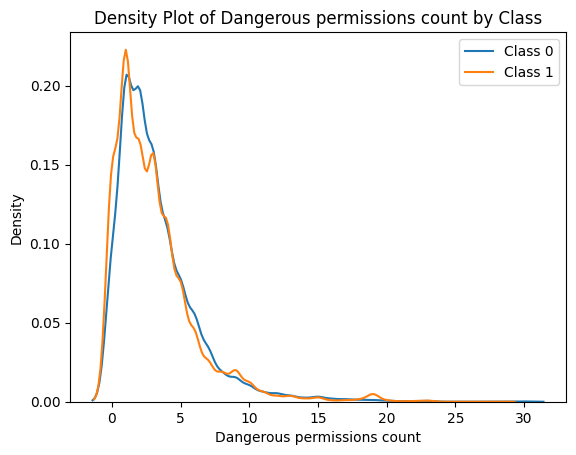

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(new_df[new_df['Class'] == 0]['Dangerous permissions count'], label='Class 0')
sns.kdeplot(new_df[new_df['Class'] == 1]['Dangerous permissions count'], label='Class 1')
plt.xlabel('Dangerous permissions count')
plt.ylabel('Density')
plt.title('Density Plot of Dangerous permissions count by Class')
plt.legend()
plt.show()

##### 1. Why did i pick the specific chart?

The density plot is used to show the distribution of the number of dangerous permissions requested by apps, categorized by their class (benign or malicious). This visual representation helps understand the relationship between the number of dangerous permissions and the likelihood of an app being malicious.

##### 2. What is/are the insight(s) found from the chart?

malicious apps tend to request a larger number of dangerous permissions compared to benign apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can be used to create a rule-based system for flagging potentially malicious apps, leading to a safer app ecosystem for users.

This insight might not be reliable, and the algorithm can wrongly identify benign apps as malicious, leading to a loss of trust and revenue for app developers.

#### Chart - 2

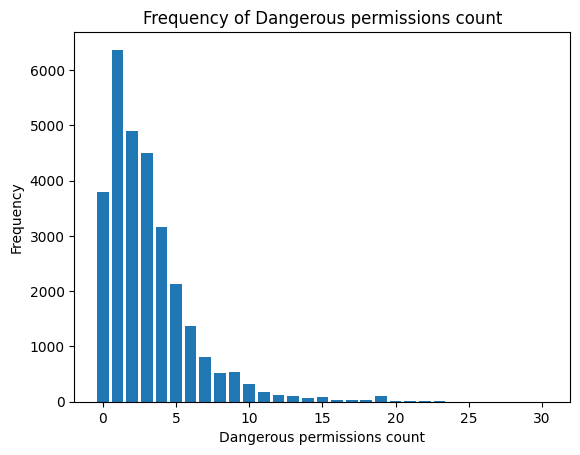

In [20]:
import matplotlib.pyplot as plt

plt.bar(new_df['Dangerous permissions count'].value_counts().index, new_df['Dangerous permissions count'].value_counts().values)
plt.xlabel('Dangerous permissions count')
plt.ylabel('Frequency')
plt.title('Frequency of Dangerous permissions count')
plt.show()

##### 1. Why did i pick the specific chart?

The Bar plot was chosen because it is a useful way to visualize the distribution of a continuous variable, in this case, the number of dangerous permissions requested by an app. This allows us to see how the data is spread out and to identify any potential outliers or trends.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the dangerous permission count of 1 has a lot of occurances.and then it decreases with the number of counts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the distribution of dangerous permissions in apps, businesses can make informed decisions about which apps to trust and which apps to avoid. This can help to reduce the risk of security breaches and data leaks.

 if businesses start to block all apps with a high number of dangerous permissions, this could limit the availability of useful apps and could lead to a decrease in user satisfaction. It is important to strike a balance between security and usability.

#### Chart - 3

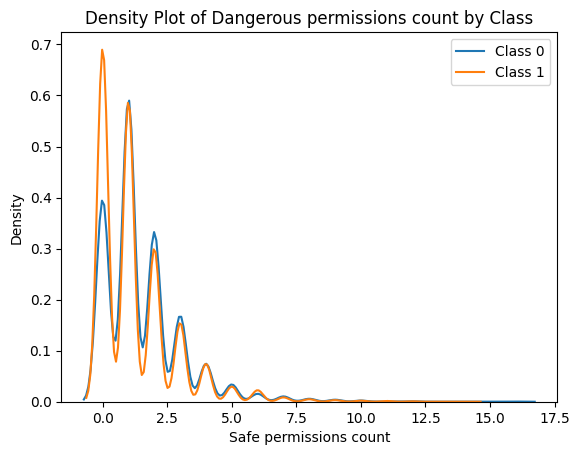

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(new_df[new_df['Class'] == 0]['Safe permissions count'], label='Class 0')
sns.kdeplot(new_df[new_df['Class'] == 1]['Safe permissions count'], label='Class 1')
plt.xlabel('Safe permissions count')
plt.ylabel('Density')
plt.title('Density Plot of Dangerous permissions count by Class')
plt.legend()
plt.show()

##### 1. Why did i pick the specific chart?

The chart is a density plot, which is a good choice for visualizing the distribution of a continuous variable. The density plot helps to understand the shape of the distribution, the location of the peaks, and the spread of the data. This particular plot is well-suited for comparing the distribution of the number of safe permissions between two classes, allowing us to see if there are any significant differences between the groups.

##### 2. What is/are the insight(s) found from the chart?

The density plot reveals that the distribution of the number of safe permissions is different between the two classes. Class 0 has a more spread-out distribution with a peak around 1-2 permissions, while Class 1 shows a more concentrated distribution with a peak around 2-3 permissions. This suggests that apps in Class 1 generally have more safe permissions than apps in Class 0.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

if the classes represent "safe" and "risky" apps, understanding the distribution of safe permissions could help in developing better app security measures. However, there is a potential negative impact. If the classes represent "high-quality" and "low-quality" apps, the insights might lead to biased decisions, such as favoring apps with a higher number of safe permissions, regardless of other factors. This could potentially stifle innovation and harm the development of apps that might be valuable even with a lower number of safe permissions.

#### Chart - 4

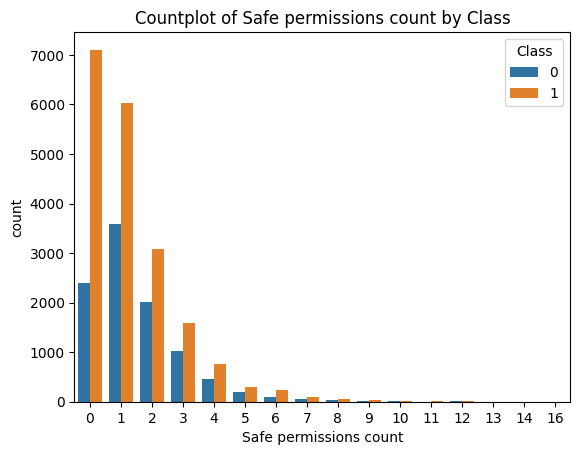

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Safe permissions count", hue="Class", data=new_df)
plt.title('Countplot of Safe permissions count by Class')
plt.show()

##### 1. Why did i pick the specific chart?

The Histogram plot is a good choice for visualizing the distribution of a continuous variable, in this case, the number of dangerous permissions. It allows us to see how the distribution of dangerous permissions differs between safe and dangerous apps, which is important for understanding the relationship between permissions and app safety.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that dangerous apps tend to have a higher number of permissions than safe apps. The distribution of dangerous permissions for dangerous apps is also more spread out, with a few apps having a very large number of permissions. This suggests that the number of permissions can be a useful indicator of an app's safety.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

app stores can use this information to develop new policies that require developers to justify the use of dangerous permissions. This would help to protect users from malicious apps and improve the overall safety of the app ecosystem.

It is possible that the insights from the chart could lead to negative growth if they are not applied carefully. For example, if app stores become too strict about the use of permissions, it could discourage developers from releasing new apps. This could lead to a decrease in the number of apps available, which would be a negative impact on the app ecosystem.






#### Chart - 5

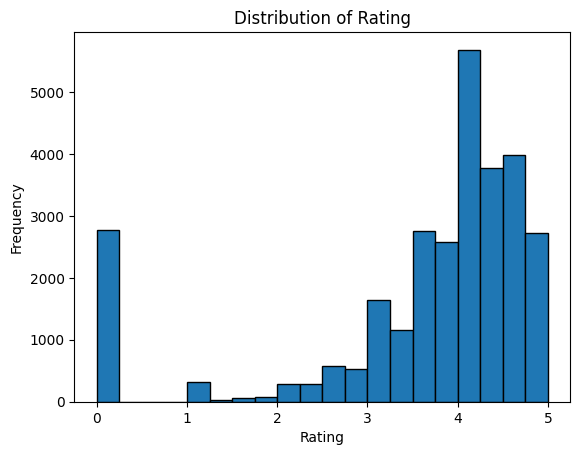

In [23]:
import matplotlib.pyplot as plt

plt.hist(new_df['Rating'], bins=20, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating')
plt.show()

##### 1. Why did i pick the specific chart?

The histogram is a good choice to visualize the distribution of a continuous variable like rating. It allows us to see the frequency of ratings across different ranges.

##### 2. What is/are the insight(s) found from the chart?

The distribution is positively skewed, meaning there are more higher ratings than lower ratings.
The most common rating is around 4.
There are very few ratings below 2.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The high average rating suggests customer satisfaction and positive brand perception.
This can lead to increased customer loyalty, positive word-of-mouth marketing, and ultimately, higher sales.

While the distribution shows a high average rating, there is a significant number of ratings below 3, indicating potential areas for improvement.
Analyzing these lower ratings and understanding the reasons behind them can help identify and address customer dissatisfaction, leading to increased customer retention and improved product/service offerings.

#### Chart - 6

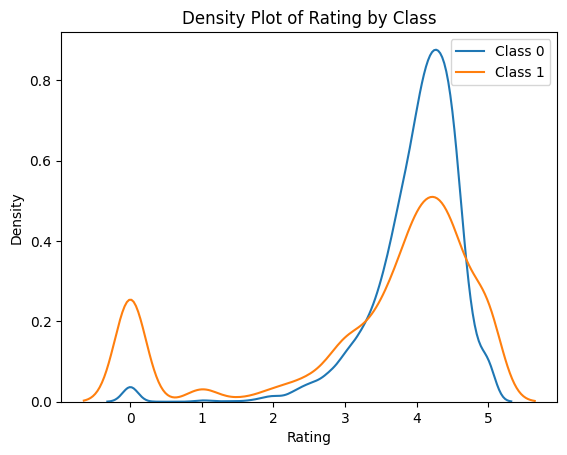

In [24]:
# Density Plot: Rating by Class
sns.kdeplot(new_df[new_df['Class'] == 0]['Rating'], label='Class 0')
sns.kdeplot(new_df[new_df['Class'] == 1]['Rating'], label='Class 1')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Density Plot of Rating by Class')
plt.legend()
plt.show()

##### 1. Why did i pick the specific chart?

The chart is a density plot which is suitable for comparing distributions of data between different groups. It shows the probability density of rating values for two classes (Class 0 and Class 1). The plot helps visualize the differences in the distributions of ratings between these two groups.

The chart shows that:

Class 0 has a higher density of ratings around 4.5. This means that more products in Class 0 tend to receive ratings closer to 4.5.
Class 1 has a higher density of ratings around 4. This means that more products in Class 1 tend to receive ratings closer to 4.

##### 2. What is/are the insight(s) found from the chart?

Weak, positive correlation between solar radiation and bike rentals.
Cluster of data points with low solar radiation and moderate bike rentals.
Outliers suggest other factors influence rental numbers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart can be used for business impact in several ways:

Product Targeting,
Marketing Campaigns,
Product Development

there are some insights from the chart that could lead to negative growth:

Ignoring Class 1 Products,
Misinterpretation of Rating Trends

#### Chart - 7

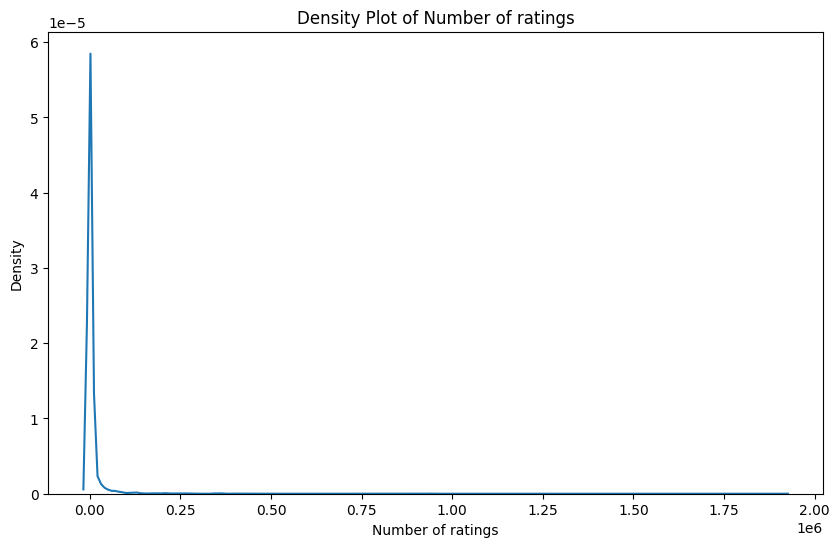

In [25]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(new_df['Number of ratings'])
plt.xlabel('Number of ratings')
plt.ylabel('Density')
plt.title('Density Plot of Number of ratings')
plt.show()

##### 1. Why did i pick the specific chart?

the density plot is because it is a good way to visualize the distribution of a continuous variable. It helps us understand the shape of the distribution, which is not always possible with a histogram.

##### 2. What is/are the insight(s) found from the chart?

The density plot shows that the distribution of the number of ratings is highly skewed to the right. This means that there are a few apps with a very large number of ratings and many apps with a small number of ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help to create a positive business impact. For example, the insights can be used to target marketing efforts to apps with a large number of ratings. This can help to increase the visibility of these movies and drive more viewers.

Yes, the insights also suggest that there are many apps with a small number of ratings. This suggests that there is a potential to grow the number of ratings for these apps. If we can find ways to encourage people to rate these apps, it could lead to positive growth.

#### Chart - 8

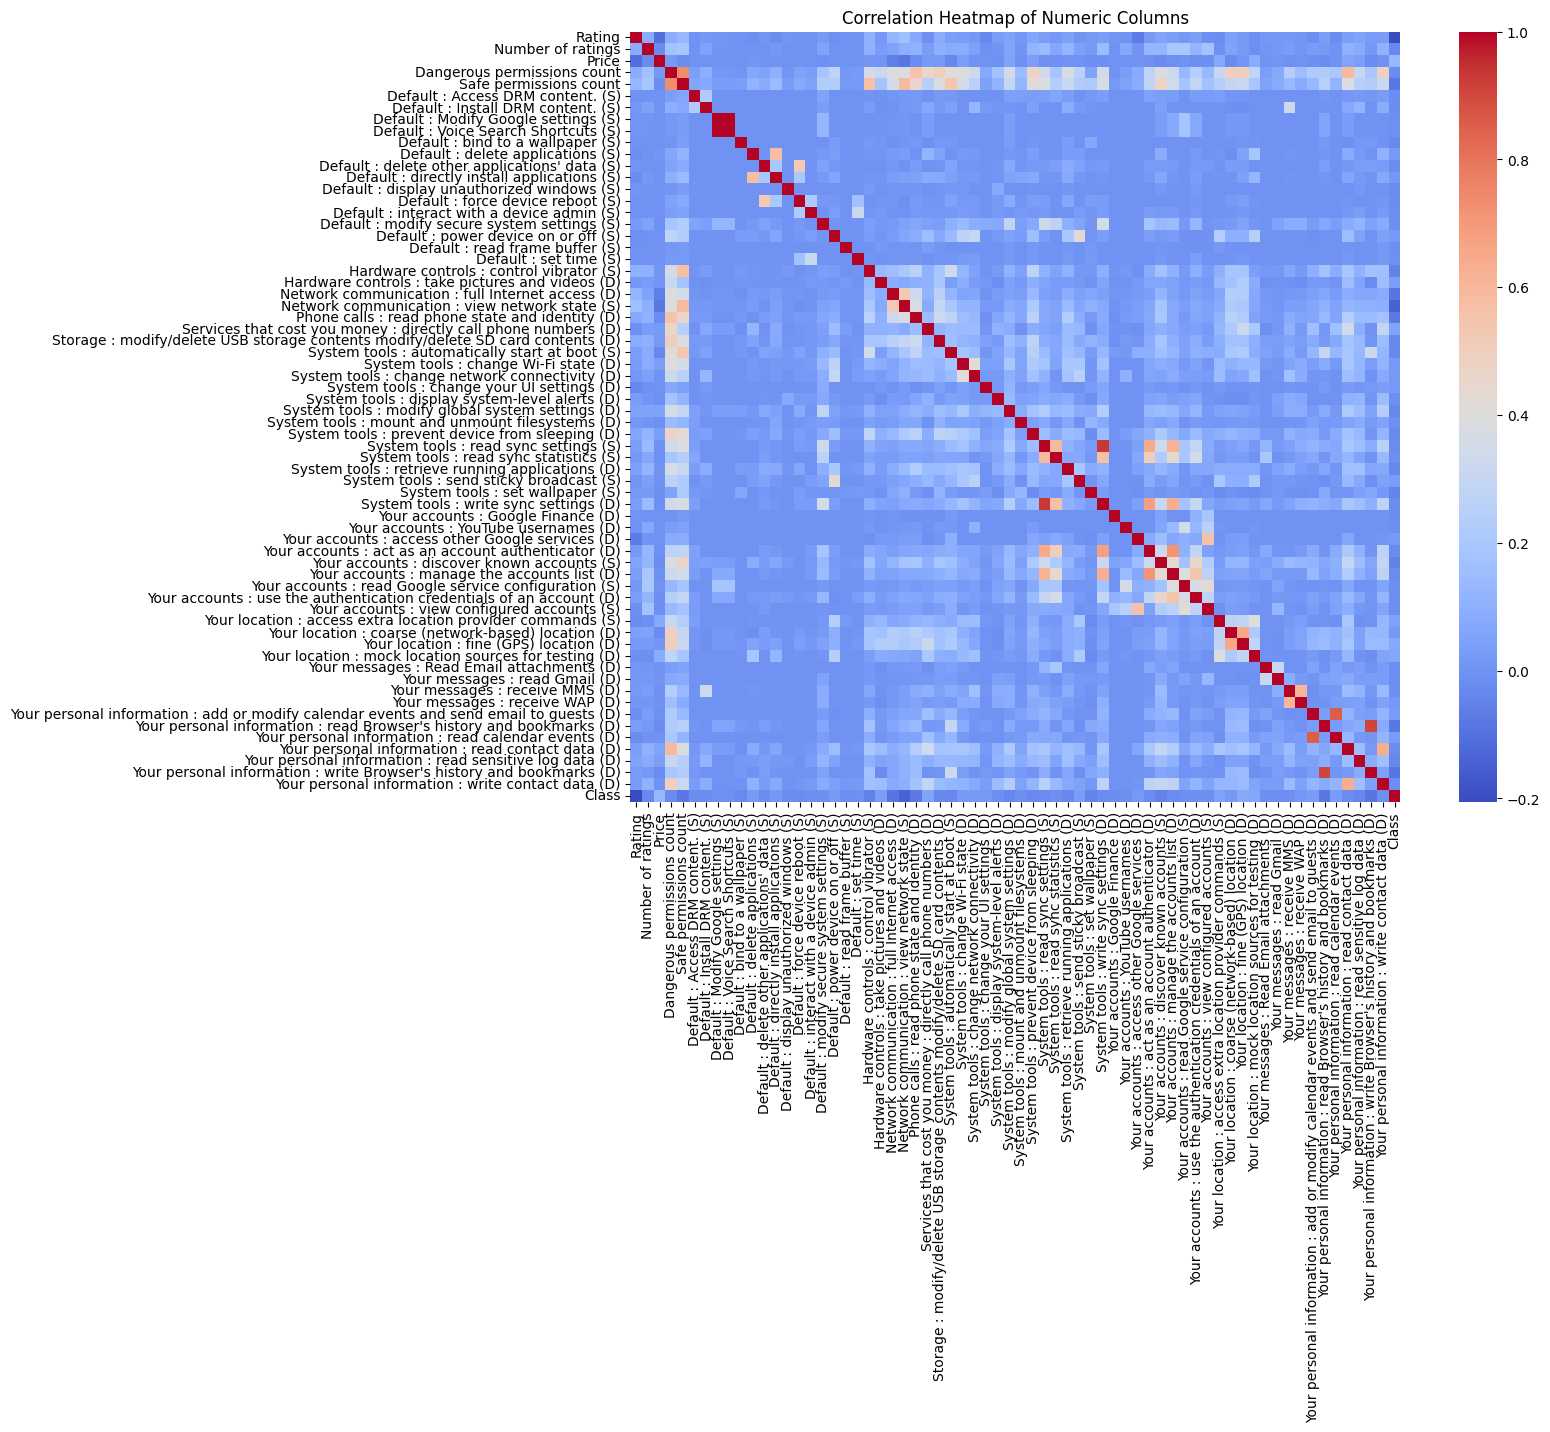

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = new_df.select_dtypes(include=[int, float]).columns

# Calculate the correlation matrix
corr_matrix = new_df[numeric_cols].corr()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", square=True, xticklabels=numeric_cols, yticklabels=numeric_cols)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

##### 1. Why did i pick the specific chart?

the correlation heat map can be used to find the correlation of the variables on the basis or corr matrix value or even the color also as done in this case.

##### 2. What is/are the insight(s) found from the chart?

Most of the variables are not having any multi-colinearity in this case, and only in 1-2 cases of the matrix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The number of variables that are collected if have multicolinearity could be optimized and only most important variables could be choosen and it helps the business in a positive manner.

#### Chart - 9

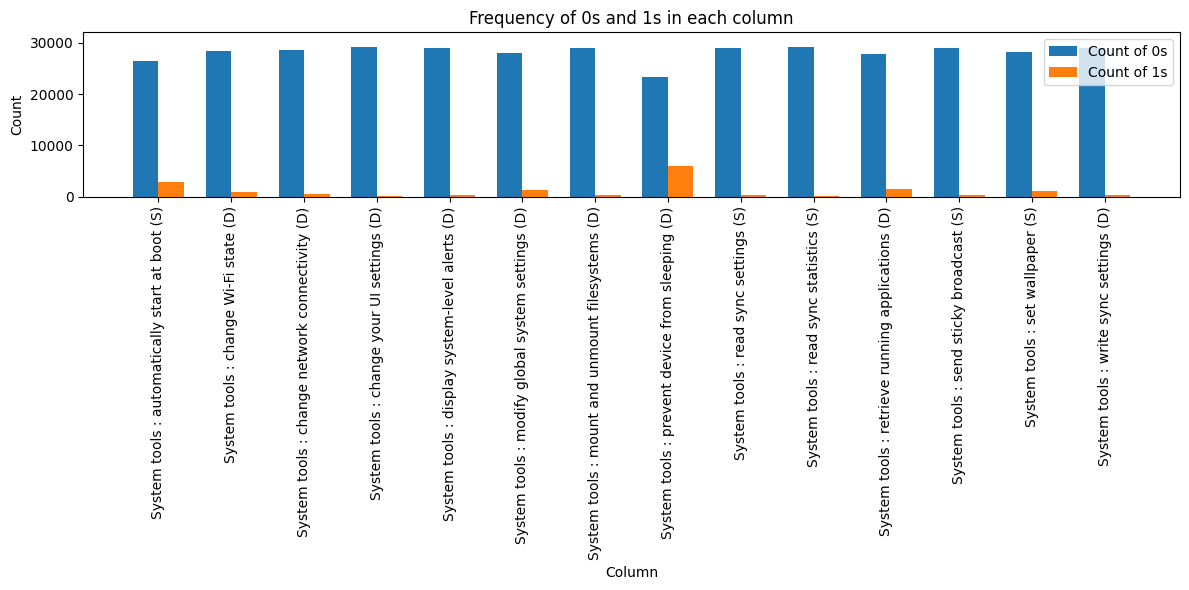

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'new_df' is your DataFrame

# Define the columns
columns = ['System tools : automatically start at boot (S)',
           'System tools : change Wi-Fi state (D)',
           'System tools : change network connectivity (D)',
           'System tools : change your UI settings (D)',
           'System tools : display system-level alerts (D)',
           'System tools : modify global system settings (D)',
           'System tools : mount and unmount filesystems (D)',
           'System tools : prevent device from sleeping (D)',
           'System tools : read sync settings (S)',
           'System tools : read sync statistics (S)',
           'System tools : retrieve running applications (D)',
           'System tools : send sticky broadcast (S)',
           'System tools : set wallpaper (S)',
           'System tools : write sync settings (D)']

# Initialize lists to store the counts
counts_0 = []
counts_1 = []

# Iterate over the columns
for col in columns:
    counts_0.append(new_df[col].eq(0).sum())
    counts_1.append(new_df[col].eq(1).sum())


# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Set the x-axis positions
x = np.arange(len(columns))
width = 0.35

# Plot the bars
ax.bar(x - width/2, counts_0, width, label='Count of 0s')
ax.bar(x + width/2, counts_1, width, label='Count of 1s')

# Set the y-axis range
ax.set_ylim(0, max(counts_0 + counts_1) * 1.1)

# Set the title and labels
ax.set_title('Frequency of 0s and 1s in each column')
ax.set_xlabel('Column')
ax.set_ylabel('Count')

# Set the x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(columns, rotation=90)

# Show the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show(block=True)

##### 1. Why did i pick the specific chart?

The bar chart shows the frequency of 0s and 1s in each column of a dataset.

##### 2. What is/are the insight(s) found from the chart?

The insights are:

* Most of the columns are dominated by 0s.
* There are few columns where the frequency of 1s is relatively higher.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights could be used to identify columns that might be relevant for predicting a certain outcome. For example, if we are trying to predict whether a user will purchase a product, we might want to focus on columns where the frequency of 1s is higher.

However, it is important to note that the chart does not provide any information about the actual meaning of the data. We would need to investigate the data further to understand the implications of these insights.

#### Chart - 10

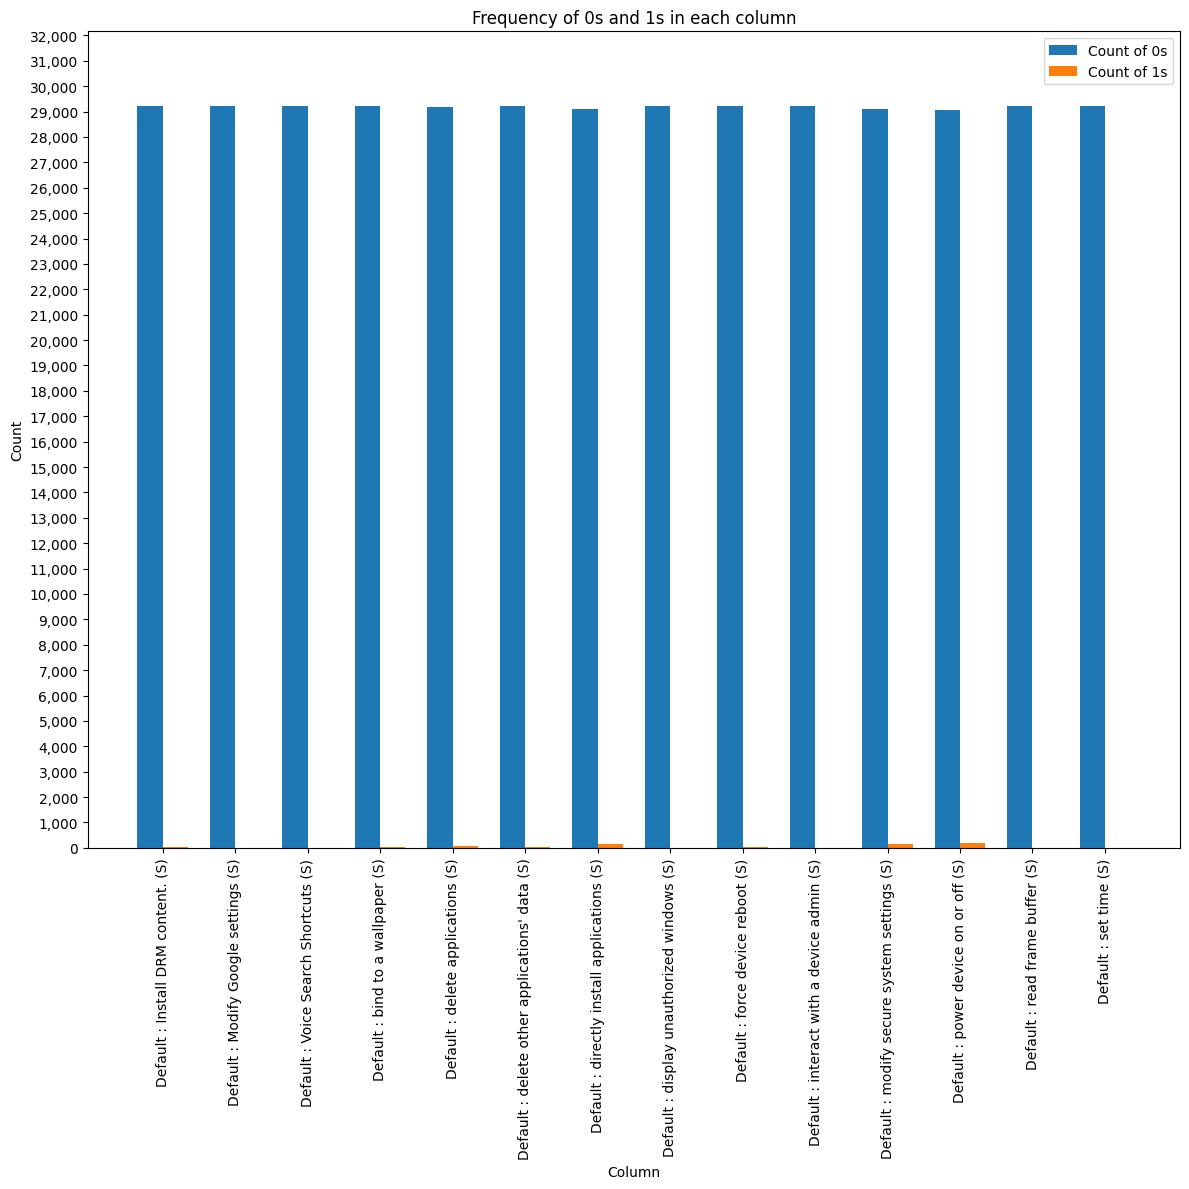

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'new_df' is your DataFrame

# Define the columns
columns = ['Default : Install DRM content. (S)',
           'Default : Modify Google settings (S)',
           'Default : Voice Search Shortcuts (S)',
           'Default : bind to a wallpaper (S)',
           'Default : delete applications (S)',
           'Default : delete other applications\' data (S)',
           'Default : directly install applications (S)',
           'Default : display unauthorized windows (S)',
           'Default : force device reboot (S)',
           'Default : interact with a device admin (S)',
           'Default : modify secure system settings (S)',
           'Default : power device on or off (S)',
           'Default : read frame buffer (S)',
           'Default : set time (S)']

# Initialize lists to store the counts
counts_0 = []
counts_1 = []

# Iterate over the columns
for col in columns:
    counts_0.append(new_df[col].eq(0).sum())
    counts_1.append(new_df[col].eq(1).sum())

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 12))

# Set the x-axis positions
x = np.arange(len(columns))
width = 0.35

# Plot the bars
ax.bar(x - width/2, counts_0, width, label='Count of 0s')
ax.bar(x + width/2, counts_1, width, label='Count of 1s')

# Set the y-axis range and ticks
ax.set_ylim(0, max(counts_0 + counts_1) * 1.1)
ax.set_yticks(np.arange(0, max(counts_0 + counts_1) * 1.1, 1000))

# Set the title and labels
ax.set_title('Frequency of 0s and 1s in each column')
ax.set_xlabel('Column')
ax.set_ylabel('Count')

# Set the x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(columns, rotation=90)

# Format the y-axis tick labels with commas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Show the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show(block=True)

##### 1. Why did i pick the specific chart?

The chart shows the frequency of 0s and 1s in each column of a dataset. This type of chart is useful for understanding the distribution of data in each column and can be used to identify columns that are predominantly 0s or 1s.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most of the columns have a very high proportion of 0s, with only a small number of 1s. This suggests that the dataset is likely to be imbalanced, which could pose problems for certain machine learning algorithms.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

An imbalanced dataset can lead to biased models that are more likely to predict the majority class. This can have a negative impact on the business, as the model may not be able to accurately identify instances of the minority class. For example, if the model is used to detect fraud, an imbalanced dataset could result in the model failing to identify fraudulent transactions.

## ***5. Hypothesis Testing***

In [29]:
df = new_df.copy()

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (𝐻0):
Safe permissions count is associated with Positive Android Classification.



Alternative Hypothesis (𝐻1):
Safe permissions count isnt associated with Positive Android Classification.



#### 2. Perform an appropriate statistical test.

In [30]:
# Create a contingency table
contingency_table = pd.crosstab(df['Safe permissions count'], df['Class'])

# Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-Square Statistic: 504.7779233843646
P-value: 5.514119494233876e-98


Interpretation: A small p-value (typically < 0.05) suggests that there is a significant association between Safe permissions count and the Class.

##### Which statistical test have you done to obtain P-Value?

Ans - Chi Square test

##### Why did you choose the specific statistical test?

Ans - It helps determine if the distribution of one categorical variable is independent of another, which is crucial for understanding feature relevance in classification tasks.

## ***6. Feature Engineering & Data Pre-processing***

## Dimensionality Reduction using PCA on numeric variables and encoding Categorical variables.

In [31]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 877.0 kB/s eta 0:00:00


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import category_encoders as ce



# Select numeric columns
numerical_cols = new_df.drop('Class', axis=1).select_dtypes(include=['number']).columns.tolist()
# scale numeric columns using StandardScaler
scaler = StandardScaler()
new_df[numerical_cols] = scaler.fit_transform(new_df[numerical_cols])

# encoding categorical variables
target_encoder = ce.TargetEncoder(cols=categorical_cols)
new_df_encoded = target_encoder.fit_transform(new_df, new_df['Class'])

In [33]:
new_df_encoded

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Install DRM content. (S),Default : Modify Google settings (S),Default : Voice Search Shortcuts (S),Default : bind to a wallpaper (S),...,Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Class,App,Package,Category,Description,Related apps
0,-0.365499,-0.149199,-0.181443,1.262883,-0.240454,-0.017547,-0.026162,-0.008271,-0.008271,-0.026809,...,3.202313,-0.157411,-0.130821,4.865707,0,0.575039,0.575039,0.445154,0.575039,0.575039
1,0.518860,-0.146546,-0.181443,-0.040600,0.412548,-0.017547,-0.026162,-0.008271,-0.008271,-0.026809,...,-0.312274,-0.157411,-0.130821,-0.205520,0,0.575039,0.575039,0.630099,0.575039,0.575039
2,0.371467,-0.145588,-0.181443,-0.692341,-0.240454,-0.017547,-0.026162,-0.008271,-0.008271,-0.026809,...,-0.312274,-0.157411,-0.130821,-0.205520,0,0.638202,0.638202,0.321470,0.661915,0.638202
3,0.002984,-0.094557,-0.181443,-1.018212,-0.893456,-0.017547,-0.026162,-0.008271,-0.008271,-0.026809,...,-0.312274,-0.157411,-0.130821,-0.205520,0,0.575039,0.575039,0.175000,0.519473,0.575039
5,0.666253,-0.150526,-0.181443,-0.040600,-0.240454,-0.017547,-0.026162,-0.008271,-0.008271,-0.026809,...,-0.312274,-0.157411,-0.130821,-0.205520,0,0.575039,0.575039,0.670937,0.575039,0.575039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,1.034736,-0.150831,-0.181443,-0.040600,-0.240454,-0.017547,-0.026162,-0.008271,-0.008271,-0.026809,...,-0.312274,-0.157411,-0.130821,-0.205520,1,0.705147,0.705147,0.984278,0.705147,0.705147
29995,0.739950,-0.149656,0.753816,-0.040600,1.065550,-0.017547,-0.026162,-0.008271,-0.008271,-0.026809,...,-0.312274,-0.157411,-0.130821,-0.205520,1,0.709127,0.709127,0.606279,0.709127,0.709127
29996,0.445164,-0.018163,-0.181443,0.285271,1.065550,-0.017547,-0.026162,-0.008271,-0.008271,-0.026809,...,-0.312274,-0.157411,-0.130821,-0.205520,1,0.661915,0.661915,0.882979,0.661915,0.661915
29997,-0.144409,-0.150766,-0.181443,-0.040600,-0.893456,-0.017547,-0.026162,-0.008271,-0.008271,-0.026809,...,-0.312274,-0.157411,-0.130821,-0.205520,1,0.705147,0.705147,0.984278,0.705147,0.705147


In [34]:
from sklearn.decomposition import PCA

# perform PCA on the concatenated data
pca = PCA(n_components=0.95)  # retain 95% of the variance
pca_data = pca.fit_transform(new_df_encoded)

In [35]:
new_df_encoded.shape

(29240, 71)

In [36]:
pca_data.shape

(29240, 51)

In [37]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_data, new_df['Class'], test_size=0.2, random_state=42)

## ***7. ML Model Implementation***

### ML Model - 1 (Logistic Regression)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve,roc_auc_score

# create a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Model:
Accuracy: 0.9379274965800274
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2003
           1       0.95      0.96      0.95      3845

    accuracy                           0.94      5848
   macro avg       0.93      0.93      0.93      5848
weighted avg       0.94      0.94      0.94      5848

Confusion Matrix:
[[1803  200]
 [ 163 3682]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

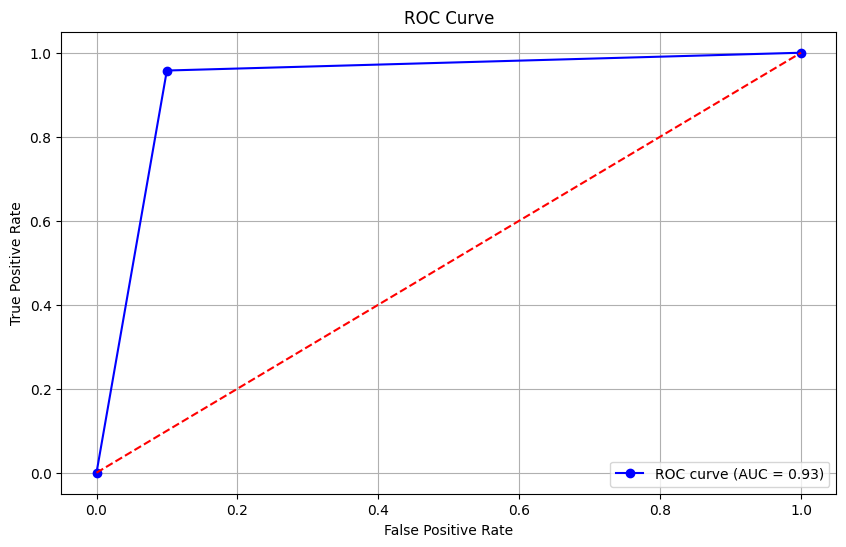

In [39]:
# Calculate ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_log_reg)
roc_auc = roc_auc_score(y_test, y_pred_log_reg)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='o', color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### 2. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

An AUC of 0.93 indicates that the model is performing very well, as it is able to correctly classify a high percentage of cases.
It can be used for :
* Malware detection
* Spam Filtering
* Fraud detection

#### 3. Cross Validaton and hyperparameter tuning.

In [40]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
param_grid_log_reg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': [1000, 2000, 3000]
}
grid_search_log_reg = GridSearchCV(LogisticRegression(), param_grid_log_reg, cv=5)
grid_search_log_reg.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", grid_search_log_reg.best_params_)
log_reg = grid_search_log_reg.best_estimator_
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

Best Parameters for Logistic Regression: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}
Logistic Regression Model:
Accuracy: 0.9584473324213406
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2003
           1       0.96      0.97      0.97      3845

    accuracy                           0.96      5848
   macro avg       0.96      0.95      0.95      5848
weighted avg       0.96      0.96      0.96      5848

Confusion Matrix:
[[1859  144]
 [  99 3746]]


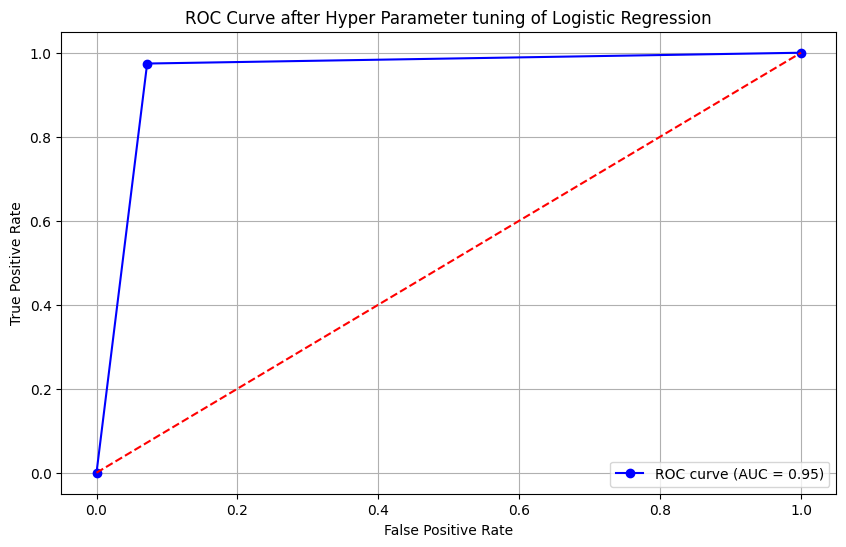

In [41]:
# Calculate ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_log_reg)
roc_auc = roc_auc_score(y_test, y_pred_log_reg)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='o', color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve after Hyper Parameter tuning of Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### ML Model - 2 (Decission Tree)




In [42]:

# Decision Tree Classification
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
print("Decision Tree Classification Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_dec_tree))
print("Classification Report:")
print(classification_report(y_test, y_pred_dec_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dec_tree))


Decision Tree Classification Model:
Accuracy: 0.8915868673050615
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2003
           1       0.92      0.92      0.92      3845

    accuracy                           0.89      5848
   macro avg       0.88      0.88      0.88      5848
weighted avg       0.89      0.89      0.89      5848

Confusion Matrix:
[[1680  323]
 [ 311 3534]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

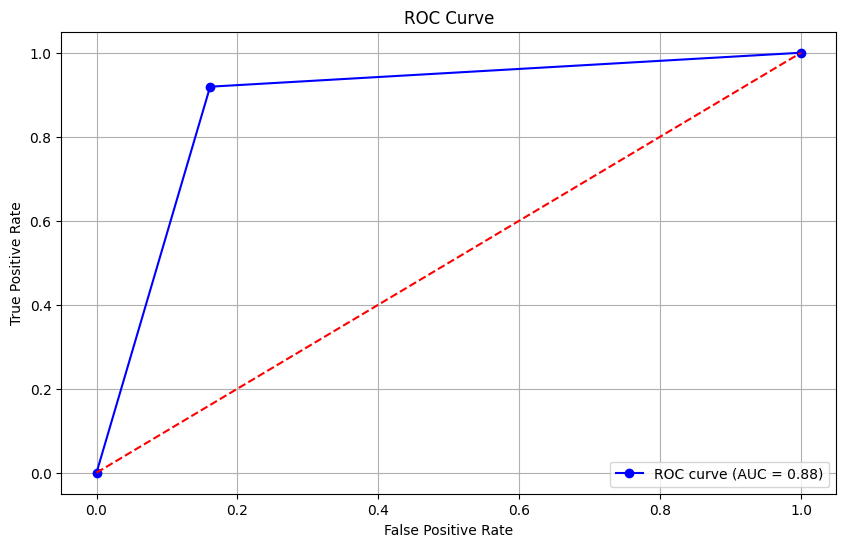

In [43]:
# Calculate ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_dec_tree)
roc_auc = roc_auc_score(y_test, y_pred_dec_tree)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='o', color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### 2. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

An AUC of 0.88 indicates that the model is performing very well, as it is able to correctly classify a high percentage of cases. It can be used for :

* Malware detection
* Spam Filtering
* Fraud detection

#### 3. Cross Validaton and hyperparameter tuning.

In [44]:

# Decision Tree Classification
param_grid_dec_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
grid_search_dec_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_dec_tree, cv=5)
grid_search_dec_tree.fit(X_train, y_train)
print("Best Parameters for Decision Tree Classification:", grid_search_dec_tree.best_params_)
dec_tree = grid_search_dec_tree.best_estimator_
y_pred_dec_tree = dec_tree.predict(X_test)
print("Decision Tree Classification Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_dec_tree))
print("Classification Report:")
print(classification_report(y_test, y_pred_dec_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dec_tree))


Best Parameters for Decision Tree Classification: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classification Model:
Accuracy: 0.8999658002735978
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2003
           1       0.92      0.93      0.92      3845

    accuracy                           0.90      5848
   macro avg       0.89      0.89      0.89      5848
weighted avg       0.90      0.90      0.90      5848

Confusion Matrix:
[[1693  310]
 [ 275 3570]]


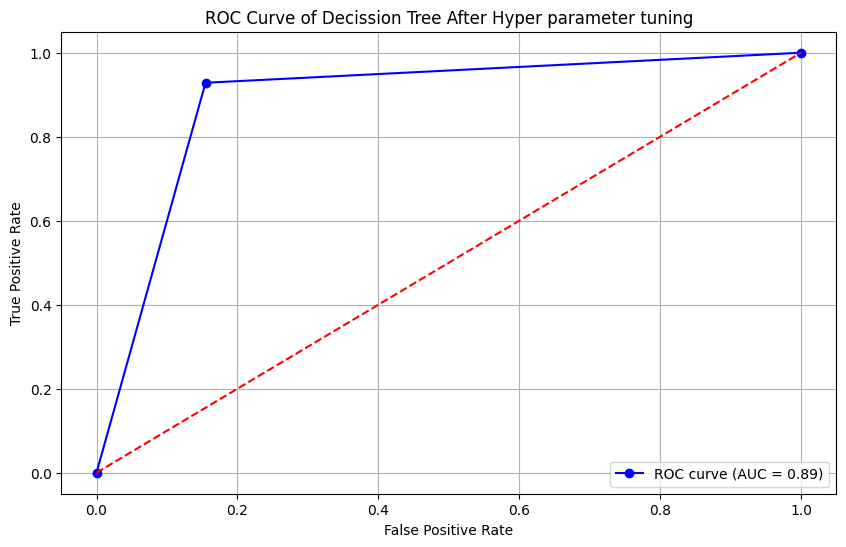

In [45]:
# Calculate ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_dec_tree)
roc_auc = roc_auc_score(y_test, y_pred_dec_tree)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='o', color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Decission Tree After Hyper parameter tuning')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### ML Model - 4 (Support Vector Classification)


In [46]:

# Support Vector Classification (SVC)
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("Support Vector Classification (SVC) Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))


Support Vector Classification (SVC) Model:
Accuracy: 0.8938098495212038
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      2003
           1       0.89      0.95      0.92      3845

    accuracy                           0.89      5848
   macro avg       0.89      0.87      0.88      5848
weighted avg       0.89      0.89      0.89      5848

Confusion Matrix:
[[1569  434]
 [ 187 3658]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

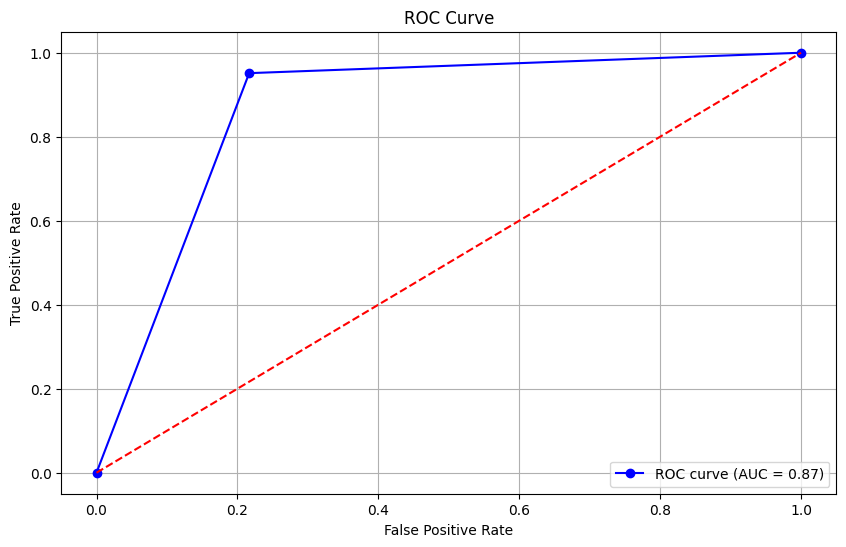

In [47]:
# Calculate ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_svc)
roc_auc = roc_auc_score(y_test, y_pred_svc)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='o', color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### 2. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

An AUC of 0.87 indicates that the model is performing very well, as it is able to correctly classify a high percentage of cases. It can be used for :

* Malware detection
* Spam Filtering
* Fraud detection

### ML Model - 4 (Random Forest Classification)


In [48]:

# Random Forest Classification
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)
print("Random Forest Classification Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rand_forest))
print("Classification Report:")
print(classification_report(y_test, y_pred_rand_forest))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rand_forest))

Random Forest Classification Model:
Accuracy: 0.9109097127222983
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      2003
           1       0.92      0.95      0.93      3845

    accuracy                           0.91      5848
   macro avg       0.91      0.89      0.90      5848
weighted avg       0.91      0.91      0.91      5848

Confusion Matrix:
[[1664  339]
 [ 182 3663]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

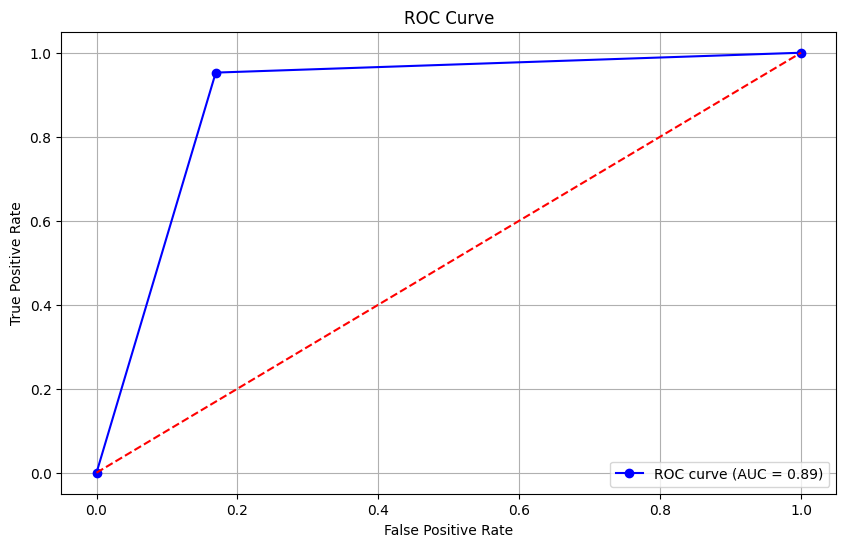

In [49]:
# Calculate ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_rand_forest)
roc_auc = roc_auc_score(y_test, y_pred_rand_forest)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='o', color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### 2. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

An AUC of 0.89 indicates that the model is performing very well, as it is able to correctly classify a high percentage of cases. It can be used for :

* Malware detection
* Spam Filtering
* Fraud detection

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [50]:
# Save the File
import pickle

# Save the model to a pickle file
with open('DecissionTree.pickle', 'wb') as f:
    pickle.dump(grid_search_dec_tree, f)
# Save the model to a pickle file
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(rand_forest, f)
# Save the model to a pickle file
with open('LogisticReg.pickle', 'wb') as f:
    pickle.dump(grid_search_log_reg, f)
# Save the model to a pickle file
with open('Svc.pickle', 'wb') as f:
    pickle.dump(svc, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [51]:
# Load the File and predict unseen data.
# Load the saved Random Forest model
with open('RandomForest.pickle', 'rb') as f:
    model = pickle.load(f)

In [52]:
X_test

array([[-0.7388576 ,  0.06532436,  0.1156877 , ...,  1.01856231,
        -0.34899427,  0.4525561 ],
       [-2.29306818,  1.20797306, -0.78833518, ..., -0.52383467,
         0.06085706, -0.20502685],
       [-1.92418295,  0.84064683, -0.38568508, ...,  0.7858589 ,
        -0.2372227 ,  0.49021138],
       ...,
       [ 2.49828204, -2.23204595, -1.15469704, ..., -2.79762272,
        -0.69277988,  0.90018003],
       [ 0.34803555, -0.44841331,  0.45788217, ...,  0.96196271,
        -0.48337379,  0.28531127],
       [-0.58230209, -0.5725427 , -0.13996327, ...,  0.65610544,
        -0.17117532,  0.37075307]])

In [53]:
#taking a input from X_test as the variables are very much,
# As an alternative all the variables can be given as a list and hitting it with Encoding+PCA for feature reduction then it could be given for prediction
sample_input = X_test[100].reshape(1, -1)

# Make predictions using the sample input
y_pred = model.predict(sample_input)
print(f"Prediction for the sample input: {y_pred}")


Prediction for the sample input: [0]


#### The 1 means that the input variables gives the result as a Valid Application, 0 means that the input variables gives the result as an Invalid Appliaction.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Conclusion
the Android authenticity prediction project demonstrated the importance of thorough data preprocessing and feature engineering in achieving optimal model performance. The classification problem was addressed using several machine learning algorithms, with the Random Forest Classification model emerging as the best-performing algorithm. The model achieved an impressive accuracy of 91%, with a recall of 95% for class 1 (authentic), reflecting its strong capability in identifying authentic Android apps. The precision and f1-scores across both classes further emphasize the model's balanced performance, making it a reliable solution for predicting Android authenticity.